In [1]:
import numpy as np
import scipy as s
import matplotlib.pyplot as plt

from scipy.integrate import odeint
from scipy import pi, stats


# physical parameters
a = 0.05   # radius of tube (m)
H = 10   # length of tube (m)
h = 0.01   # thinckness of tube (m)
sigma = 5.92e7   # conductivity of tube material (Siemens)
mu = 4*pi*1e-7   # magnetic permeability
m = 2   # dipole moment (A/m^2)
M = 0.0030   # mass of magnet (kg)
g = 9.81   # gravity acceleration (N/kg)

def magForce(z,J):
    return 3*mu*J*m*a**2 /2 * z/(a**2+z**2)**(5/2)

def dPhidz(z,v):
    return -3*mu*m*v*a**2 /2 * z/(a**2+z**2)**(5/2)

final coordinate of magnet, in cm: -12.1288443074

final coordinate of magnet, in cm: -28.7730685742

final coordinate of magnet, in cm: -58.8112805152

final coordinate of magnet, in cm: -182.537756376

final coordinate of magnet, in cm: -436.465616349



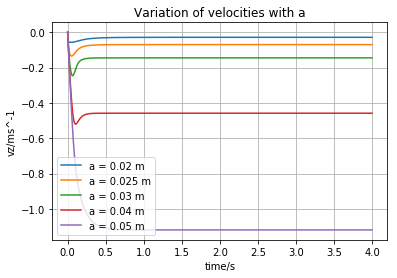

In [58]:
# solve using a basic first order Euler finite difference approach "x[t+dt] = x[t] + dt*x'[t]"


# simulation parameters
t_max = 4
max_iter = 2000
dt = t_max/max_iter
init_height = 0.0*H
N = 10000  # number of ring partitions of tube
dH = H/N   # height of one ring   # resistance of elemental ring (Ohm)
Z_ring = -(np.arange(N)+1/2) * dH   # array that stores effective positions of rings


# choosing a simulation/physical parameter y to vary and create a graph X_y(t) for different values of y
param_choice = 'a' # choose an "independent" physical parameter y to vary ...
param_units = 'm'
param_values = [0.02, 0.025, 0.03, 0.04, 0.05] #  ... among these values 
num_param = len(param_values)
dependent_qty = np.zeros((max_iter, num_param)) # initialise array for storing dependent quantity X of interest (e.g. velocity) for all parameter values



# substitute the actual (Python) variable that stores the physical qty. of "param_choice" in this FOR loop
# which is looping among param values

for p,a in enumerate(param_values):
    
    R = 2*pi*a/(sigma*h*dH)
    
    T = np.linspace(0,t_max,max_iter)  # time array, i.e. the "background" 
    Z = np.zeros((max_iter))   # array that stores positions of magnet as time progresses
    V = np.zeros((max_iter))   # dZ/dt
    A = np.zeros((max_iter))   # dV/dt
    J = np.zeros((max_iter, N)) # currents in Amperes
    F = np.zeros((max_iter, N)) # forces in Newtons

    J[0] = 0
    Z[0] = init_height
    V[0] = 0
    Z[1] = Z[0] + V[0]*dt


    for i in range(0,max_iter-2):
        #print((np.ones(N)*Z[i]-Z_ring).shape)
        #print((J[i,:]).shape)
        #print((-3*mu*J[i,:]*m).shape)
        #print(((np.ones(N)*Z[i]-Z_ring)).shape)
        #print(((a**2+(np.ones(N)*Z[i]-Z_ring)**2)**(5/2)).shape)
        #print(-3*mu*J[i,:]*m*a**2 /2 * (np.ones(N)*Z[i]-Z_ring)/(a**2+(np.ones(N)*Z[i]-Z_ring)**2)**(5/2))
        F[i,:] = magForce(Z[i]-Z_ring, J[i,:])
        #if not(i%(max_iter/10)):
            #print(Z[i]-Z_ring)
            #print(F[i,:])
            #print(sum(F[i,:]))
        A[i] = -g + 1/M * sum(F[i,:])
        V[i+1] = V[i] + A[i]*dt
        J[i+1,:] = 1/R * dPhidz(Z[i+1]-Z_ring,V[i+1])
        #if not((i+1)%(max_iter/4)):
            #print(J[i+1,:])
            #print()
        Z[i+2] = Z[i+1] + V[i+1]*dt
    
    # now, crucially, choose which physical quantity to track in our graph - typically the velocity
    dependent_qty[:,p] = V  



    #plt.plot(T,Z,'b',label='simulation')
    #plt.plot(T,init_height-1/2*g*T**2,'g',label='free fall')
    #plt.plot(T, 0*np.ones(max_iter),'r', label='beginning of tube')
    #plt.plot(T, -H*np.ones(max_iter),'r', label='end of tube')
    #plt.legend()
    #plt.xlabel('time/s')
    #plt.ylabel('z/m')
    #plt.title('Plot of z-coordinate of falling magnet')
    #plt.grid()
    #plt.show()
    
    print("final coordinate of magnet, in cm:",Z[-1]*100)
    #print("and in case of free fall, in cm:  ",(init_height-1/2*g*T[-1]**2)*100)
    print()
    


for p,val in enumerate(param_values):
    plt.plot(T[:-1],dependent_qty[:-1,p],label = param_choice+' = '+str(val)+' '+param_units )
plt.xlabel('time/s')
plt.ylabel('vz/ms^-1')
plt.title('Variation of velocities with '+param_choice)
plt.grid()
plt.legend()
plt.show()
    



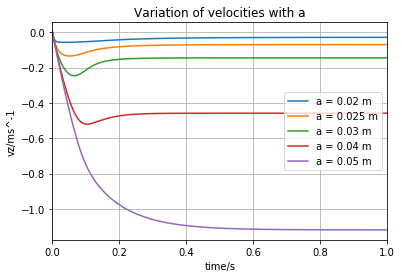

[-0.02865483 -0.06995783 -0.14506455 -0.45847562 -1.11932524]


In [63]:
for p,val in enumerate(param_values):
    plt.plot(T[:-1],dependent_qty[:-1,p],label = param_choice+' = '+str(val)+' '+param_units )
plt.xlabel('time/s')
plt.ylabel('vz/ms^-1')
plt.xlim(0,1)
plt.title('Variation of velocities with '+param_choice)
plt.grid()
plt.legend(loc='center right')
plt.show()



print(dependent_qty[-2,:])

[-1.98626443  0.64630083]


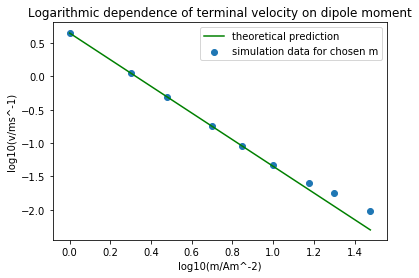

In [2]:
# examination of v_term(m)

m_values = np.array([1, 2, 3, 5, 7, 10, 15, 20, 30])
V_term_values = np.array([-4.4589946, -1.11919922, -0.49747799, -0.17910639, -0.09161973, -0.04666386,
 -0.02548156, -0.01797518, -0.00959539])


fit = np.polyfit(np.log10(m_values[:-3]), np.log10(np.abs(V_term_values[:-3])),1)
print(fit)

v_theoretical = 64 * (mu/4/pi)**(-2) * a**4 * M*g / (45 * pi**2 * h * sigma * m_values**2)

plt.scatter(np.log10(m_values), np.log10(np.abs(V_term_values)), label='simulation data for chosen m')
#plt.plot(np.log10(m_values), np.polyval(fit, np.log10(m_values)),'k',label='fit Y = -1.986*X + 0.646')
plt.plot(np.log10(m_values), np.log10(v_theoretical),'g', label="theoretical prediction")
plt.title("Logarithmic dependence of terminal velocity on dipole moment")
plt.xlabel("log10(m/Am^-2)")
plt.ylabel("log10(v/ms^-1)")
plt.legend()
plt.show()

[-0.02865483 -0.06995783 -0.14506455 -0.45847562 -1.11932524 -2.32103272
 -4.29954436 -7.30101184]


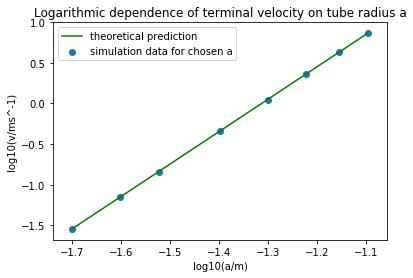

In [3]:
# examination of v_term(a)

a_values = np.array([0.02, 0.025, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08])
V_term_values = np.array([-0.02865483, -0.06995783, -0.14506455, -0.45847562, -1.11932524,-2.32103272, -4.29954436, -7.30101184])
#V_term_values = dependent_qty[max_iter//10,:]
#a_values = np.array(param_values)
print(V_term_values)


#fit = np.polyfit(np.log10(a_values), np.log10(np.abs(V_term_values)),1)
#print(fit)

v_theoretical = 64 * (mu/4/pi)**(-2) * a_values**4 * M*g / (45 * pi**2 * h * sigma * m**2)

plt.scatter(np.log10(a_values), np.log10(np.abs(V_term_values)), label='simulation data for chosen a')
#plt.plot(np.log10(a_values), np.polyval(fit, np.log10(a_values)),'k',label='fit Y = 3.998*X + 5.250')
plt.plot(np.log10(a_values), np.log10(v_theoretical),'g', label="theoretical prediction")
plt.title("Logarithmic dependence of terminal velocity on tube radius a")
plt.xlabel("log10(a/m)")
plt.ylabel("log10(v/ms^-1)")
plt.legend()
plt.show()

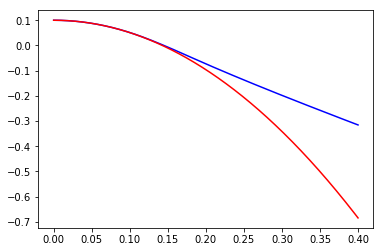

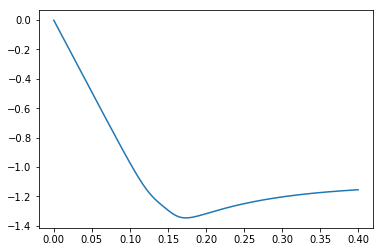

final coordinate of magnet, in cm: -31.566135209
value from ref. simulation, in cm: -65.1665
and in case of free fall, in cm:   -68.48

percentage error from reference:   -51.5607939524 %


In [9]:
# solve using an improved finite difference approach "x[t+dt] = x[t] + dt*x'[t+1/2*dt]"


T = np.linspace(0,t_max,max_iter)

Z = np.zeros((max_iter))   # array that stores positions of magnet as time progresses
V = np.zeros((max_iter))
A = np.zeros((max_iter))

J = np.zeros((max_iter,N))   
F = np.zeros((max_iter,N))

J[0,:] = 0
Z[0] = init_height
A[0] = -g
V[0] = 0 + 1/2*dt*A[0] # V[0] is in fact V[1/2], all indices for velocity are shifted forwards by 1/2
Z[1] = Z[0] + V[0]*dt
J[1,:] = 1/R * dPhidz(Z[1],V[0]+1/2*dt*A[0])  # use extrapolated velocity between V[1/2] and V[3/2] to get V[1]



for i in range(1,max_iter-1):
    #print((np.ones(N)*Z[i]-Z_ring).shape)
    #print((J[i,:]).shape)
    #print((-3*mu*J[i,:]*m).shape)
    #print(((np.ones(N)*Z[i]-Z_ring)).shape)
    #print(((a**2+(np.ones(N)*Z[i]-Z_ring)**2)**(5/2)).shape)
    #print(-3*mu*J[i,:]*m*a**2 /2 * (np.ones(N)*Z[i]-Z_ring)/(a**2+(np.ones(N)*Z[i]-Z_ring)**2)**(5/2))
    F[i,:] = magForce(Z[i]-Z_ring, J[i,:])
    #if not(i%(max_iter/10)):
        #print(Z[i]-Z_ring)
        #print(F[i,:])
        #print(sum(F[i,:]))
    A[i] = -g + 1/M * sum(F[i,:])
    V[i] = V[i-1] + A[i]*dt   # e.g. for i=1: V[3/2] = V[1/2] + A[1]*dt
    Z[i+1] = Z[i] + V[i]*dt   # e.g. for i=1: Z[2] = Z[1] + V[3/2]*dt
    J[i+1,:] = 1/R * dPhidz(Z[i+1]-Z_ring,V[i]+1/2*dt*A[i]) # e.g. for i=1: J[2] = f( Z[2], V[3/2]+A[2]*1/2*dt )
    #if not((i+1)%(max_iter/4)):
        #print(J[i+1,:])
        #print()
    
    
plt.plot(T,Z,'b')
plt.plot(T,init_height-1/2*g*T**2,'r')
plt.show()

plt.plot(T[:-1],V[:-1])
plt.show()

#for n in range(0,N,N//3):
    #print("J"+str(n))
    #plt.plot(T,J[:,n])
    #plt.show()


print("final coordinate of magnet, in cm:",Z[-1]*100)
print("value from ref. simulation, in cm:", ref)
print("and in case of free fall, in cm:  ",(init_height-1/2*g*T[-1]**2)*100)
print()
print("percentage error from reference:  ",(Z[-1]*100-ref)/(ref) * 100,"%")


In [ ]:
# solve using finite difference approach which does not invoke matrices A,V, but instead expresses time derivatives from Z
# use two point operator for A=Z'':  (Z[i+1] - 2*Z[i] + Z[i-1]) / dt**2 = g - 1/M * magForce(Z[i],J[i])
# use central difference for V=Z': (Z[i+1] - Z[i-1])  / (2*dt) == Z'

T = np.linspace(0,t_max,max_iter)

Z = np.zeros((max_iter))   # array that stores positions of magnet as time progresses
J = np.zeros((max_iter,N))   
F = np.zeros((max_iter,N))


Z[0] = init_height
Z[1] = Z[0] - 1/2 * g * dt**2

J[0] = 0
J[1] = 1/R * dPhidz(Z[1],V[0]+1/2*dt*A[0])  # use extrapolated velocity between V[1/2] and V[3/2] to get V[1]



for i in range(1,max_iter-1):

    # one approach as follows - but not feasible this way, as J[i] needs Z[i+1] and vice versa
    #J[i,:] = 1/R * dPhidz(Z[i]-Z_ring, (Z[i+1]-Z[i-1])/(2*dt))
    #F[i,:] = magForce(Z[i]-Z_ring, J[i,:])
    #Z[i+1] = dt**2 * (-g + 1/M * F[i,:]) + 2*Z[i] - Z[i-1]
    
    
    # better to directly express J[i] = beta * (Z[i+1]-Z[i-1])/(2*dt) * (Z[i]-Z_ring)
    Z_rel = Z[i]-Z_ring  # shorthand for the vector encoding relative displacements from all 
    Z[i+1] = 
    
    
plt.plot(T,Z,'b')
plt.plot(T,init_height-1/2*g*T**2,'r')
plt.show()

#for n in range(0,N,N//3):
    #print("J"+str(n))
    #plt.plot(T,J[:,n])
    #plt.show()


print("final coordinate of magnet, in cm:",Z[-1]*100)
print("value from ref. simulation, in cm:", ref)
print("and in case of free fall, in cm:  ",(init_height-1/2*g*T[-1]**2)*100)
print()
print("percentage error from reference:  ",(Z[-1]*100-ref)/(ref) * 100,"%")
